# Image preprocessing

This assignment is to give hands on experience in text pre processing. (IMAGE)

**Zip file attached with this contains 10 images of different sizes. Your task is to do data preprocessing**

<dl>
<dd>1) make all images to equal size of 256X256 (use padding if required. Do not stretch images now). Store these in input folder. These 10 images will be used for next processes</dd>
<dd>3) Perform histogram equalization of each input image and store in output folder</dd>
<dd>4) Perform sharping of images and store in Output folder</dd>
<dd>5) Perform blurring of images and store in output folder</dd>
<dd>6) Shift each image Vertically or Horizontally by 15% and store in "intermediate" folder </dd>
<dd>7) Create 5 new images from each image from "intermediate" folder by doing random rotations between -30 to +30 degrees. Store these images in "output" folder </dd>
<dd>8) Perform horizontal and vertical flips of each image from "intermediate" folder. Store these images in "output" folder</dd>
</dl>


In [45]:
# import
import os
from PIL import Image, ImageOps #Python Imaging Library aka now Pillow
# Image is main class and ImageOps for extended stuff like
#aspect ratio, flipping, padding, and applying effects like invert or grayscale
import glob #file name pattern matching

import matplotlib.pyplot as plt

import numpy as np
from skimage import exposure
from skimage import filters
import cv2

from scipy.ndimage import shift

import random

## Extract images

Extract images

In [28]:
#Im gonna load them from my gdrive, efficient to run code to import than
#manually import every runtime.

from google.colab import drive
drive.mount("/content/drive")

!ls "/content/drive/MyDrive/oko/dseAsn2/image/Data"
%cd '/content/drive/MyDrive/oko/dseAsn2/image/Data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cat.179.jpg  cat.255.jpg  cat.367.jpg  cat.437.jpg  cat.524.jpg
cat.191.jpg  cat.310.jpg  cat.417.jpg  cat.501.jpg  cat.617.jpg
/content/drive/MyDrive/oko/dseAsn2/image/Data


## make all images to equal size of 256X256

use padding if required. Do not stretch images now.

Store these in a folder with name "input" . These 10 images will be used for next processes

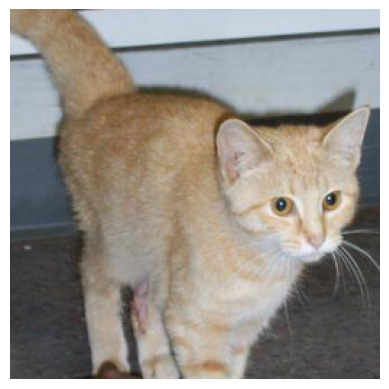

In [29]:
# code for making images to 256 X 256
out_dir = '../Intermediate/Input'
images = []
for img in glob.glob('*.jpg'):
    image = Image.open(img)
    # Resize while maintaining aspect ratio and adding padding
    image = ImageOps.fit(image, (256, 256), method=Image.Resampling.LANCZOS, centering=(0.5, 0.5))
    output_path = os.path.join(out_dir, os.path.basename(img))
    if not output_path.lower().endswith('.jpg'):
        output_path += '.jpg'
    image.save(output_path)
    images.append(image)

#images[0].show() #doesnt work for colab
plt.imshow(images[0])
plt.axis('off')  # Hide the axes for better view
plt.show()

## histogram equalization

perform histogram equalization of each image in folder named "intermediate"

/content/drive/MyDrive/oko/dseAsn2/image/Intermediate/Input


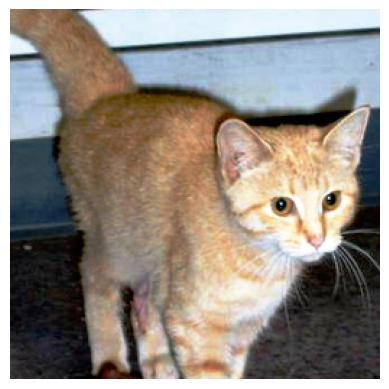

In [30]:
# code for histogram equalization
%cd '/content/drive/MyDrive/oko/dseAsn2/image/Intermediate/Input'
img_inpt = []
out_dir = '../../Output'

images = []
for img in glob.glob('*.jpg'):
    img_inpt = Image.open(img)

    # Apply histogram equalization to the image (convert to NumPy array)
    hist_eq_image = exposure.equalize_hist(np.array(img_inpt))

    # Convert the NumPy array back to a PIL Image
    hist_eq_image_pil = Image.fromarray((hist_eq_image * 255).astype(np.uint8))

    # Define the output file path
    output_path = os.path.join(out_dir, os.path.basename(img) + '_histEq.jpg')
    if not output_path.lower().endswith('.jpg'):
        output_path += '.jpg'

    # Save the processed image
    hist_eq_image_pil.save(output_path)

    # Append the processed image to the list
    images.append(hist_eq_image_pil)
plt.imshow(hist_eq_images[0], cmap='gray')
plt.axis('off')  # Hide the axes for better view
plt.show()

## sharping

Perform sharpening of each image in folder named "intermediate"

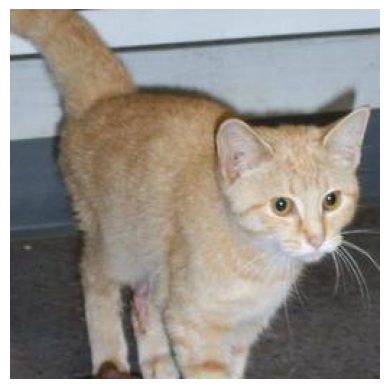

In [32]:
# code for sharpening

img_inpt = []
sharpened_images = []

for img in glob.glob('*.jpg'):
    img_inpt = Image.open(img)

    # Convert the PIL image to a NumPy array
    img_array = np.array(img_inpt)

    # Apply unsharp mask for sharpening (using skimage's unsharp_mask function)
    sharpened_image = np.clip(img_array + filters.unsharp_mask(img_array, radius=1, amount=1), 0, 255)

    # Convert the sharpened image back to a PIL image
    sharpened_image_pil = Image.fromarray(sharpened_image.astype(np.uint8))

    # Define the output file path for sharpened image
    output_path = os.path.join(out_dir, os.path.basename(img))
    if not output_path.lower().endswith('.jpg'):
        output_path += '.jpg'

    # Save the sharpened image with the suffix "_sharpened"
    sharpened_output_path = os.path.join(out_dir, os.path.splitext(os.path.basename(img))[0] + '_sharpened.jpg')
    sharpened_image_pil.save(sharpened_output_path)

    # Append the sharpened image to the list
    sharpened_images.append(sharpened_image_pil)

# Display the sharpened image (e.g., first one in the list)
plt.imshow(np.array(sharpened_images[0]), cmap='gray')
plt.axis('off')  # Hide the axes for better view
plt.show()

## blurring

Perform blurring of each image in folder named "intermediate"

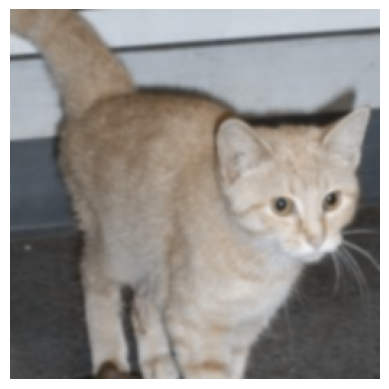

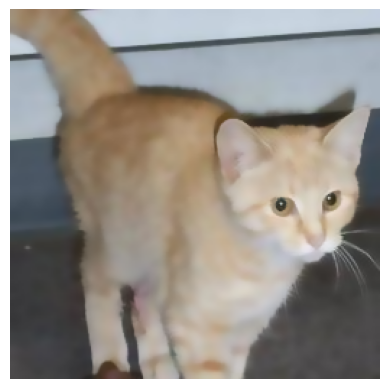

In [39]:
# code for blurring
img_inpt = []

# use gaussian kernel

blurred_gaussian_images = []

for img in glob.glob('*.jpg'):
    img_inpt = Image.open(img)

    # Convert the PIL image to a NumPy array
    img_array = np.array(img_inpt)

    # Apply Gaussian blurring using skimage
    blurred_gaussian_image = filters.gaussian(img_array, sigma=1)  # Adjust sigma for more/less blur

    # Convert back to PIL image and save it
    blurred_gaussian_image_pil = Image.fromarray((blurred_gaussian_image * 255).astype(np.uint8))

    # Define the output file path for the blurred Gaussian image
    output_path = os.path.join(out_dir, os.path.splitext(os.path.basename(img))[0] + '_blurred_gaussian.jpg')

    # Save the image
    blurred_gaussian_image_pil.save(output_path)

    # Append the blurred image to the list
    blurred_gaussian_images.append(blurred_gaussian_image_pil)

# Display the first blurred Gaussian image
import matplotlib.pyplot as plt
plt.imshow(np.array(blurred_gaussian_images[0]), cmap='gray')
plt.axis('off')  # Hide the axes for better view
plt.show()

# Use Bilateral blurring

blurred_bilateral_images = []

for img in glob.glob('*.jpg'):
    img_inpt = Image.open(img)

    # Convert the PIL image to a NumPy array
    img_array = np.array(img_inpt)

    # Apply Bilateral blurring using OpenCV
    blurred_bilateral_image = cv2.bilateralFilter(img_array.astype(np.uint8), d=9, sigmaColor=75, sigmaSpace=75)

    # Convert back to PIL image and save it
    blurred_bilateral_image_pil = Image.fromarray(blurred_bilateral_image)

    # Define the output file path for the blurred bilateral image
    output_path = os.path.join(out_dir, os.path.splitext(os.path.basename(img))[0] + '_blurred_bilateral.jpg')

    # Save the image
    blurred_bilateral_image_pil.save(output_path)

    # Append the blurred image to the list
    blurred_bilateral_images.append(blurred_bilateral_image_pil)

# Display the first blurred Bilateral image
import matplotlib.pyplot as plt
plt.imshow(np.array(blurred_bilateral_images[0]), cmap='gray')
plt.axis('off')  # Hide the axes for better view
plt.show()

## Shifting images

Shift each image from "intermediate" folder  Vertically or Horizontally by 15% and store in output folder

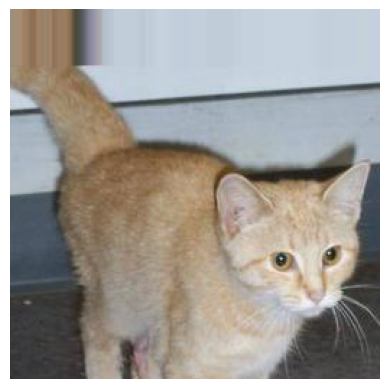

In [42]:
# code for shifting
# Fill missing pixels with the color of the nearest pixel
img_inpt = []
out_dir = '../'
shifted_images = []

shift_percentage = 0.15

for img in glob.glob('*.jpg'):
    img_inpt = Image.open(img)

    # Convert the PIL image to a NumPy array
    img_array = np.array(img_inpt)

    # Get the image dimensions
    height, width, channels = img_array.shape

    # Calculate the vertical shift amount
    vertical_shift = int(height * shift_percentage)

    # Shift the image vertically (downwards or upwards)
    shifted_image_vertical = shift(img_array, (vertical_shift, 0, 0), mode='nearest')

    # Convert back to PIL image
    shifted_image_vertical_pil = Image.fromarray(shifted_image_vertical)

    # Define the output file path for the vertically shifted image
    output_path_vertical = os.path.join(out_dir, os.path.splitext(os.path.basename(img))[0] + '_shifted_vertical.jpg')

    # Save the vertically shifted image
    shifted_image_vertical_pil.save(output_path_vertical)

    # Append the shifted image to the list
    shifted_images.append(shifted_image_vertical_pil)

# Display the first shifted image (e.g., vertically shifted image)
import matplotlib.pyplot as plt
plt.imshow(np.array(shifted_images[0]), cmap='gray')
plt.axis('off')  # Hide the axes for better view
plt.show()


## Rotating images

Create 5 new images from each image from "intermediate" folder by doing random rotations between -30 to +30 degrees. Store these images in "output" folder

/content/drive/MyDrive/oko/dseAsn2/image/Intermediate


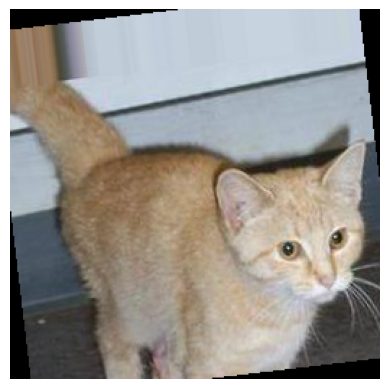

In [47]:
# code for random rotations

%cd '/content/drive/MyDrive/oko/dseAsn2/image/Intermediate'
out_dir = '../Output'  # Parent directory
rotated_images = []

for img in glob.glob('*.jpg'):  # Assuming images are in 'intermediate' folder
    img_inpt = Image.open(img)

    # Create 5 rotated versions of the image with random rotations between -30 and +30 degrees
    for i in range(5):
        # Generate a random angle between -30 and +30 degrees
        random_angle = random.uniform(-30, 30)

        # Rotate the image by the random angle
        rotated_image = img_inpt.rotate(random_angle, resample=Image.Resampling.BICUBIC)

        # Define the output file path for the rotated image with a unique suffix
        output_path = os.path.join(out_dir, os.path.splitext(os.path.basename(img))[0] + f'_rotated_{i}.jpg')

        # Save the rotated image
        rotated_image.save(output_path)

        # Append the rotated image to the list
        rotated_images.append(rotated_image)

# Optionally, display the first rotated image (for verification)
import matplotlib.pyplot as plt
plt.imshow(np.array(rotated_images[0]))
plt.axis('off')  # Hide the axes for better view
plt.show()

## flipping

Perform horizontal and vertical flips of each image from "intermediate" folder. Store these images in "output"

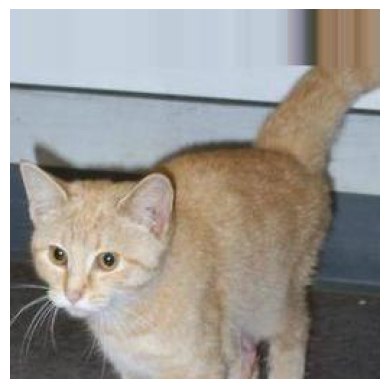

In [48]:
# code for flipping
flipped_images = []

# Loop over all images in the 'Intermediate' folder
for img in glob.glob('*.jpg'):  # Assuming images are in 'Intermediate' folder
    img_inpt = Image.open(img)

    # Perform horizontal and vertical flips (2 flips per image)
    flipped_image_horizontal = img_inpt.transpose(Image.FLIP_LEFT_RIGHT)
    flipped_image_vertical = img_inpt.transpose(Image.FLIP_TOP_BOTTOM)

    # Define output paths for flipped images
    output_path_horizontal = os.path.join(out_dir, os.path.splitext(os.path.basename(img))[0] + '_flipped_horizontal.jpg')
    output_path_vertical = os.path.join(out_dir, os.path.splitext(os.path.basename(img))[0] + '_flipped_vertical.jpg')

    # Save the flipped images
    flipped_image_horizontal.save(output_path_horizontal)
    flipped_image_vertical.save(output_path_vertical)

    # Append the flipped images to the list
    flipped_images.append(flipped_image_horizontal)
    flipped_images.append(flipped_image_vertical)

# Optionally, display the first flipped image (for verification)
if flipped_images:
    plt.imshow(np.array(flipped_images[0]))
    plt.axis('off')  # Hide the axes for better view
    plt.show()


## Not mandatory

Can perform some mathematical operations (such as addition, subtraction, multiplication), change of colour etc to the images in random and can increase the number of images in output folder.

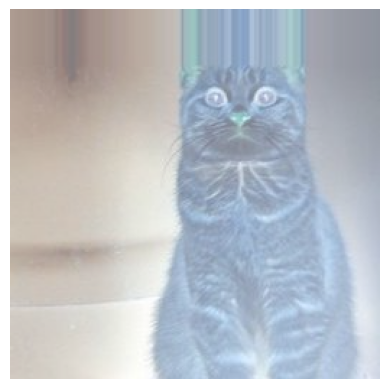

In [49]:
# optional code

processed_images = []

# Get all the images in the 'Intermediate' folder
image_files = glob.glob('*.jpg')

# Select 3 random images
selected_images = random.sample(image_files, 3)

for img in selected_images:
    img_inpt = Image.open(img)

    # Convert image to NumPy array for manipulation
    img_array = np.array(img_inpt)

    # Randomly choose a mathematical operation
    operation = random.choice(['add', 'subtract', 'multiply'])

    # Apply the operation with a random factor
    if operation == 'add':
        factor = random.uniform(0, 50)  # Random value to add
        img_array = np.clip(img_array + factor, 0, 255)
    elif operation == 'subtract':
        factor = random.uniform(0, 50)  # Random value to subtract
        img_array = np.clip(img_array - factor, 0, 255)
    elif operation == 'multiply':
        factor = random.uniform(0.5, 1.5)  # Random multiplication factor
        img_array = np.clip(img_array * factor, 0, 255)

    # Apply a random color transformation
    color_transform = random.choice(['gray', 'invert', 'swap'])

    if color_transform == 'gray':
        # Convert to grayscale by averaging the color channels
        img_array = np.mean(img_array, axis=2, keepdims=True)
        img_array = np.repeat(img_array, 3, axis=2)  # Repeat to keep 3 channels
    elif color_transform == 'invert':
        # Invert the colors
        img_array = 255 - img_array
    elif color_transform == 'swap':
        # Randomly swap two color channels (e.g., R and B)
        img_array[:, :, [0, 2]] = img_array[:, :, [2, 0]]

    # Convert the NumPy array back to a PIL image
    processed_image_pil = Image.fromarray(img_array.astype(np.uint8))

    # Define the output file path with the random suffix
    output_path = os.path.join(out_dir, os.path.splitext(os.path.basename(img))[0] + '_random.jpg')

    # Save the processed image
    processed_image_pil.save(output_path)

    # Append the processed image to the list
    processed_images.append(processed_image_pil)

# Optionally, display the first processed image (for verification)
if processed_images:
    plt.imshow(np.array(processed_images[0]))
    plt.axis('off')  # Hide the axes for better view
    plt.show()